# Lab 06 : Multidimensional Root Finding

## Objectives

The main objectives are as follows:
* Develop the solution to a standard problem in multidimensional root finding.
* Document and test this solution.


## Initialization

As always, initialize your environment now by loading all modules required and setting up the plotting environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

# For random numbers
rng = np.random.default_rng()

## Static Mass-Spring Configuration

<div style='display: inline; float: right; padding-left: 3px'>
    <img src="https://github.com/cwru-phys-250/p250-spring-2025/raw/main/figures/static_springs.png" />
</div>
We will be studying a mass-spring system. Shown at the right is a form of this labeled as we would probably think about it if we were solving it analytically.

Our goal is to find the static configuration for this system.

As shown in the figure, this would mean finding the lengths, $\ell_i$, and angles, $\theta_i$, for the springs given the spring constants $k_i$, the natural lengths of the spring $\ell_{0i}$, and the masses $m_j$. This is six quantities to determine. However, this is a perilous path to follow. Though quite educational, if we used this approach we would find it requires more work and that the "naive" implementation leads to an incorrect solution! Unfortunately we do not have time to pursue this (as previous students have done). Instead, we will jump to a better approach: use vectors. As we will continue to learn in our physics career, writing things in terms of vectors (and matrices) is far simpler.

<div style='display: inline; float: right; padding-left: 3px'>
    <img src="https://github.com/cwru-phys-250/p250-spring-2025/raw/main/figures/static_springs_vectors.png" />
</div>
A more general form of the system is shown in the figure at the right. Here we allow for an arbitrary origin to our coordinate system and specify the locations of the supports as the vectors $\vec{R}_j$ (we could easily have more than two) and the locations of massess as $\vec{r}_j$ (again, we could easily have more than two). Our objective is to find these $\vec{r}_j$ given $\vec{R}_j$, and the same parameters for the springs, $k_i$, and the masses, $m_j$. The red arrows in the figure represent the length vectors for the springs, $\vec\ell_i$. Notice that now we are only solving for the positions of the masses. This means solving for four quantities, not six! We thus only need four equations, all of which come from Newton's second law.

In practice we can make things a little simpler by placing the origin at the location of one of the two supports, rather than having it arbitrary. Doing so makes the $\vec{R}_j$ simple vectors.

### Problem Specification

To solve this system we first need to know exactly what problem we want to solve. Vaguely it is to determine the static configuration. It is worth thinking about what that means for yourself. For the lab we will clearly specify the system along with what input will be given and what output is to be produced. You will be "guided" on how to think about and set up this problem. That does not mean this will be the best approach.

When solving a problem we should try to be as general as possible. Rarely are we really interesting in the exact problem given, instead we are interested in a class of problems and would like to be able to solve any in that class. In this case we could imagine many generalizations to the system shown in the figure. We could allow for many changes.
1. Arbitrary number of masses.
2. Arbitrary number of connecting springs to each mass.
3. Arbitrary number of support points.
4. Three dimensional configuration.

#### Initial Problem Specification

We should include generalizations in our code if they do not make the solution significantly more complicated. For this lab you do not need to include such generalizations, but you should think about them.

Our problem will be: given two masses, $m_1$ and $m_2$, connected by three springs with spring constants $k_1$, $k_2$, and $k_3$ and natural lengths $\ell_{0,1}$, $\ell_{0,2}$, and $\ell_{0,3}$ at two support points separated by a distance $d$, determine the locations of the two masses $(x_j, y_j)$, in the static configuration.

#### Dimensionless Form

Actually, before proceeding we can do more than that. As is almost always the case we need to worry about units. Yet units should not matter. In fact, in the problem given does it matter if the distance between the support points is 1 cm, 1 meter, 1 mile, *etc.*? No! In general it is always best to work in terms of dimensionless quantities, that is, quantities that are relative to each other. In this case we really do not care what $d$ is, all we really care about is how all the lengths in this system compare to $d$. This means we can think of measuring all lengths in units of $d$, or equivalently that we will specify the natural lengths as the ratio $\ell_{0,i}/d$ and find the locations of the masses in units of $d$, e.g., $x_j/d$, as our solution. Effectively this means that we can "just set" $d=1$ and when we say, for example, that $\ell_{0,1}=1.5$ we mean that $\ell_{0,1}=1.5 d$. Similarly it is convenient to specify the masses in terms of some mass unit, it really does not matter what it is. Let us call this mass $M$. We will thus always specify things as a ratio of masses. To make this more clear let us define $\mu_j \equiv m_j/M$. Finally, instead of specifying the spring constants in some units we can normalize them with this mass scale too by defining $\kappa_i \equiv \frac{k_i d}{M g}$, where $g$ is the gravitational constant.

#### Final Problem Specification

The new statement of our problem is as follows. Given two normalize masses, $\mu_j$, and three springs with normalized spring constants, $\kappa_i$, and natural lengths, $\ell_{0,i}$ in units of $d$, determine in the static configuration the positions of the two masses $(x_j, y_j)$ in units of $d$.

### System of Equations

We need to find a total of four quantities, $x_j$ and $y_j$ for each of the two masses, so we need four equations to solve. Ultimately we will be able to write these equations in the form
$$ \vec{f}(\vec{y}) = 0 $$
and our goal will be to find the $\vec{y}$ that solves this system of nonlinear equations.

To begin we need the system of equations. You will derive them and document them here.

What does it mean to "document"? You should give enough information that either you, or a classmate, could easily follow the steps and reproduce your results. This means you should not just give the final equations without any discussion/description, nor should you provide step-by-step algebraic manipulations. Instead you should determine what are the key ideas, what are the key steps, what intermediate steps are worth seeings, and finally, what is the final result.

Derive a system of nonlinear equations of the form "left-hand side equals zero" for the mass-spring system. Express your equations in terms of the quantities $x_j$ and $y_j$ given the inputs $\ell_{0,i}$, $\kappa_i$, and $\mu_j$. Clearly describe your solution and document your equations giving their final form as a system of four equations, all written using `Markdown` and LaTeX. As good, young physicists your first thought will be to draw free-body diagrams. Follow the usual procedure you would from introductory physics and describe it below.

#### FBD & Newton's 2nd Law
Create a free body diagram for each mass and write the equilibrium equations in the x and y direction
$$
\begin{align}
    \sum F_{m1x} &= F_{s1x} + F_{s3x} &= 0, \\
    \sum F_{m1y} &= F_{s1y} + F_{s3y} - W_{m1} &= 0, \\
    \sum F_{m2x} &= F_{s3x} + F_{s2x} &= 0, \\
    \sum F_{m2y} &= F_{s2y} + F_{s3y} - W_{m2} &= 0 
\end{align}
$$
Trigonometry
$$
\begin{align}
    \sum F_{m1x} &= F_1\cos(\theta_1) + F_3\cos(\theta_3) &= 0, \\
    \sum F_{m1y} &= F_1\sin(\theta_1) + F_3\sin(\theta_3) - W_{m1} &= 0, \\
    \sum F_{m2x} &= F_3\cos(\theta_3) + F_2\cos(\theta_2) &= 0, \\
    \sum F_{m2y} &= F_2\sin(\theta_2) + F_3\sin(\theta_3) - W_{m2} &= 0
    \end{align}
$$
Write trig in terms of distances with x and y positions
$$
\begin{align}
    \sum F_{m1x} &= \kappa_1\left(\ell_{0,1}-\sqrt{x_1^2+y_1^2}\right)\left(\frac{x_1}{\sqrt{x_1^2+y_1^2}}\right)+\kappa_3\left(\ell_{0,3}-\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}\right)\left(\frac{x_2-x_1}{\sqrt{(y_2-y_1)^2+(x_2-x_1)^2}}\right) &= 0, \\
    \sum F_{m1y} &= \kappa_1\left(\ell_{0,1}-\sqrt{x_2^2+y_1^2}\right)\left(-\frac{y_1}{\sqrt{x_1^2+y_1^2}}\right)+\kappa_3\left(\ell_{0,3}-\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}\right)\left(\frac{-|y_2-y_1|}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}}\right)-\mu_1g &= 0, \\
    \sum F_{m2x} &= \kappa_3\left(\ell_{0,3}-\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}\right)\left(\frac{x_2-x_1}{\sqrt{(y_2-y_1)^2+(x_2-x_1)^2}}\right)+\kappa_2\left(\ell_{0,2}-\sqrt{(1-x_2)^2+(-y_2)^2}\right)\left(\frac{1-x_2}{\sqrt{y_2^2+(1-x_2)^2}}\right) &= 0, \\
    \sum F_{m2y} &= \kappa_2\left(\ell_{0,2}-\sqrt{(1-x_2)^2+(-y_2)^2}\right)\left(\frac{y_2}{\sqrt{y_2^2+(1-x_2)^2}}\right)+\kappa_3\left(\ell_{0,3}-\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}\right)\left(\frac{|y_2-y_1}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}}\right)-\mu_2g &= 0
    \end{align}
$$

### Implementation of the System of Equations

The next step is to implement these equations. The input of this function will include an array `y` that contains the current guess for the locations of the masses. You must chose (and document) an order in which this information is stored. (This is very similar to `solve_ivp`.)

The function you write calculates your system of equations and returns it as a numpy array. What order should you write the equations in? It does not matter, however, you should make it easy to understand. You chose an order to write them in your documentation above, use the same order here! It will be far less confusing to the reader if you preserve this ordering. In other words, be consistent between your documentation and code!

We will want our function to be "vectorized". This means we want our function to work even if `y` is given as a two dimensional array of shape $(4,N)$ for arbitrary $N$. In other words, there will be four rows and an arbitrary number of columns. If you write your function in the "natural" way with appropriate uses of things like `np.zeros_like`, it might "just work" but we may also need to be careful and will definitely need to test it.

Write a function to return the values of the left-side of your system of equations as a numpy array. Your function must be of the form
```
def static_conditions(y, l0, kappa, mu):
```
where `y` is ordered as you choose and document, `l0` is an array containing the natural lengths of the spring (in units of $d$), `kappa` are the normalized spring constants, and `mu` are the normalized masses. **Clearly document your code.** (Of course you will not use any loops, since none are needed.)

In [2]:
def static_conditions(y, l0, kappa, mu):
    """This function contains the four equilibrium equations for the two masses in the x and y direction equal to 0
    Masses and springs are numbered as seen in the figure at the top of the lab

    Input:
        y : array of the initial x and y positions of mass 1 and 2
            y[0] = x position mass 1
            y[1] = x position mass 2
            y[2] = y position mass 1
            y[3] = y position mass 2
        l0 : array of the normalized natural lengths of springs with respect to d
            l0[0] = spring 1 attached to mass 1
            l0[1] = spring 2 attached to mass 2
            l0[2] = spring 3 attached to mass 1 and mass 2
        kappa : array of the normalized spring constants in the same order as l0
        mu : normalized masses
            mu[0] = mass 1
            mu[1] = mass 2
    Outputs:
        force : array containing the forces acting on each mass in the order
            f[0] =  mass 1 x direction
            f[1] = mass 1 y direction
            f[2] = mass 2 x direction
            f[3] = mass 2 y direction
            
    """
    
    g = 9.81 # m/s^2
    force = np.zeros_like(y)

    divisors_start=[0,0,0,0]
    divisors_start[0]=np.sqrt(np.dot(y[0],y[0]) + np.dot(y[2],y[2]))
    divisors_start[1]=np.sqrt(np.dot(y[0],y[0])+np.dot(y[2],y[2]))
    divisors_start[2]=np.sqrt(np.dot(y[3]-y[2],y[3]-y[2])+(y[1]-y[0])**2)
    divisors_start[3]=np.sqrt(np.dot(y[3],y[3])+(1-y[1])**2)
    # print(y)
    # print(np.dot(y[0],y[0]), np.dot(y[2],y[2]))
    # print('divisors start: ', divisors_start)

    divisors_end=[0,0,0,0]
    divisors_end[0]=np.sqrt(np.dot(y[3]-y[2],y[3]-y[2])+(y[1]-y[0])**2)
    divisors_end[1]=np.sqrt(((y[1]-y[0])**2+(y[3]-y[2])**2))
    divisors_end[2]=np.sqrt(np.dot(y[3],y[3])+(1-y[1])**2)
    divisors_end[3]=np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2)
    # print('divisors end: ', divisors_end)
   
    # force m1x
    force[0] = kappa[0]*(l0[0]-np.sqrt(np.dot(y[0],y[0])+np.dot(y[2],y[2])))*((y[0]/divisors_start[0] 
                + kappa[2]*(l0[2]
                - np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2)*((y[1]-y[0])/divisors_end[0]))))
    # force m1y
    force[1] = kappa[0]*(l0[0]-np.sqrt(np.dot(y[1],y[1])+np.dot(y[2],y[2])))*(-y[2]/divisors_start[1]) + kappa[2]*(l0[2]-np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2)) * ((-np.abs(y[3]-y[2])/divisors_end[1])) - mu[0]*g
    # force m2x
    force[2] = kappa[2]*(l0[2]-np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2))*((y[1]-y[0])/divisors_start[2]) + kappa[1]*(l0[1]-np.sqrt(np.dot(1-y[1],1-y[1])+np.dot(-y[3],-y[3])))*((1-y[1])/divisors_end[2])
    # force m2y
    force[3] = kappa[1]*(l0[1]-np.sqrt(np.dot(1-y[1],1-y[1])+np.dot(-y[3],-y[3])))*(y[3]/divisors_start[3]) + kappa[2]*(l0[2]-np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2))*((np.abs(y[3]-y[2])/divisors_end[3])) - mu[1]*g 
    return force


## Newton-Raphson Method

As discussed in the lecture and shown in the example this week, we can use the Newton-Raphson method to solve a system of non-linear equations. We saw that the Newton-Raphson method is an iterative algorithm. Let $\vec y_n$ be a guess for the desired solution.  An improved guess is given by
$$ \vec y_{n+1} = \vec y_n + \Delta\vec y = \vec y_n - \mathsf{J}_{\vec f}^{-1}(\vec y) \vec f(\vec y), $$
where $\mathsf{J}_{\vec f}(\vec y)$ is the Jacobian matrix. From an initial guess, $\vec y_0$, we iteratively improve our estimate and stop when convergence has been obtained, that is, when the correction becomes sufficiently small.

### Jacobian Matrix

As we have seen, the Jacobian matrix is the matrix of first derivatives of the function. Written more explicitly
$$
\mathsf{J}_{\vec f} (\vec y) = \begin{pmatrix}
\frac{\partial f_1}{\partial y_1} & \frac{\partial f_1}{\partial y_2} & \cdots \\
\frac{\partial f_2}{\partial y_1} & \frac{\partial f_2}{\partial y_2} & \cdots \\
\vdots & \vdots & \ddots
\end{pmatrix} .
$$

This matrix can be calculated analytically or numerically. Just as in the prelab, we will do so numerically using center differencing. Thus, just knowing $\vec f(\vec y)$ and step sizes $\vec h$ (potentially different step sizes for each coordinate) we can construct the Jacobian matrix. Here you can use your work from the prelab with a small generalization.

Write a function for calculating the Jacobian matrix at a point $\vec y$ using center differencing with step sizes $\vec h$ for a system of equations described by a function $\vec f(\vec y)$. The idea is the same as in the prelab, but here we now allow for this function to take extra arguments. Though we could require the use of `lambda` function, we will not, we will instead use `args`. As always, document your function!

In [3]:
def Jacobian(f, y, h, args=()):
    
    """ Numerically calculate the Jacobian for a set of functions, f,
    at a point, x, using center differencing with step sizes, h.
    
    Inputs :
        f : Python function : Called as f(y) for an array of y values.
            This must be vectorized.
            It must accept a two dimensional array of y values and return
            a same shaped two dimensional array.
        y : array : Point at which to evaluate the Jacobian.
        h : array : Step sizes used in center differencing.
        args = extra arguments to pass to f
    """
    
    hmat = np.diag(h)
    J = (f((y+hmat).T,*args) - f((y-hmat).T,*args)) / (2*h[0])
    return J


### Newton-Raphson Implementation

We can now finally implement the Newton-Raphson method where we will calculate the Jacobian numerically. As we have done for the Jacobian itself, this can be written in a generic way. Since the Newton-Raphson method works for any set of functions and associated Jacobian matrix, we can write an implementation that is independent of the particular problem we are solving. Here we can pass in all the relevant functions. In writing such a generic implementation, we allow for the specification of the desired convergence tolerances (absolute in `atol` and relative in `rtol`). Finally, as noted in the example from this week, whenever we have an algorithm that depends on a convergence criterion to end we must specify a maximum number of iterations to allow. Without this it is possible (and even likely) that we will encounter a case that never converges and thus the algorithm will never complete!

Implement the Newton-Raphson iteration scheme in a function of the form given below.

Here `f` is Python function that evaluates the set of functions for which we are finding roots and will be called as `f(y, *args)`, `Jacobian` computes the Jacobian matrix for the set of functions using center differencing with steps sizes given in `h` and will be called as defined above, `y0` is our initial guess at the roots, `itermax` is the maximum number of iterations allowed, and `atol` and `rtol` are the desired absolute and relative tolerances.

Your function should return the best estimate of the roots (in a NumPy array) and the number of iterations required, both of these in a tuple.

In [4]:
def newton_raphson_iterate(f, Jacobian, y0, h, itermax, args=(), atol=1e-10, rtol=1e-10):
    """Simplified function to solve a system of equations,
    f(y)=0,
    iterating from an initial guess, y0, using the Newton-Raphson method.
    This implementation does not allow for extra arguments to f nor the Jacobian.
    
    Inputs:
      f : function that returns an array of N values.
          It is called as f(y)
      Jacobian : function that returns the NxN Jacobian for the system of
                 equations in f as a 2d array.
                 It is called as Jacobian(y)
      y0 : numpy array of size N containing the initial guess for the solution.
      itermax: integer, the maximum number of allowed iterations.
      
    Outputs: Tuple containing the following
      y : array of size N of the best estimate of the solution.
      niter : integer, the number of iterations required to find the solution.
    """
    
    # Copy y0 as our starting guess. We do not want to overwrite it.
    y = y0.copy()
    niter = 1
    while niter <= itermax:
        J = Jacobian(f,y,h,args=(args))
        dy = np.dot(la.inv(J), f(y,*args).T)
        y -= dy
        if np.allclose(np.zeros_like(dy), dy, atol=1e-10, rtol=1e-10):
            break
        niter += 1
    return (y, niter)

### Test Case 1:

As a first test, suppose that the two masses hang directly below the support on the right. We can analytically determine all the relevant parameters. To do so we need to choose $\ell_{0,1}$ such that there is no tension. Do *not* choose $\kappa_1 = 0$ as this would lead to a weaker test; we know the correct value for $\ell_{10}$ independent of the choice of $\kappa_1$.

First solve for positions. the $x$ position of both masses is easy: $x_j=1$. What about $y$? For arbitrary values of $\kappa_i$, $\ell_{20}$, $\ell_{30}$ determine values for $y_j$ and $\ell_{0,1}$. Document these choices below using LaTeX.

$$ \ell_{0,1}=\sqrt{1+(\frac{-\mu_2g-\kappa_2\ell_{0,2}-\mu_1g}{\kappa_2}-\frac{\mu_1g}{\kappa_3}-\ell_{0,3})^2} $$
$$ y_1 = -\frac{\mu_2g-\kappa_2\ell_{0,2}-\mu_1g}{\kappa_2}-\frac{\mu_1g}{\kappa_3}-\ell_{0,3} $$
$$ y_2 = -\frac{\mu_2g-\kappa_2\ell_{0,2}-\mu_1g}{\kappa_2} $$

Test your `static_conditions` function using the results from above for some choice of inputs. Include the test using `assert`.

In [5]:
# when all values defined as 1:
# y1 = -31.43
# y2 = -20.62
# l0,1 = 31.4459043438
# equilibrium conditions are met if force = 0

# establish variables
muvec = [1, 1]
kappavec = [1, 1, 1]
l0vec = [0, 1, 1] # use equation to fill in l0,1

def ypos1(mu, kappa, length):
    '''define position of m1 based off given values
    '''
    g = 9.81
    yp1 = ((-mu[1]*g - kappa[1]*length[1] - mu[0]*g)/kappa[1]) - ((mu[0]*g)/kappa[2]) - length[2]
    return yp1

def ypos2(mu, kappa, length):
    '''define position of m2 based off given values
    '''
    g = 9.81
    yp2 = ((-mu[1]*g - kappa[1]*length[1] - mu[0]*g)/kappa[1])
    return yp2

def length01(mu, kappa, length):
    '''define natural length of spring 1 based off given values
    '''
    g = 9.81
    return np.sqrt(1 + (((-mu[1]*g - kappa[1]*length[1] - mu[0]*g)/kappa[1]) - ((mu[0]*g)/kappa[2]) - length[2])**2)

l0vec = [length01(muvec, kappavec, l0vec), 1, 1]
yvec = [1, 1, ypos1(muvec, kappavec, l0vec), ypos2(muvec, kappavec, l0vec)]
force = static_conditions(yvec, l0vec, kappavec, muvec)
true_val = [0, 0, 0, 0]

assert(np.allclose(force, true_val))

### Test Case 2:

There are more tests we can do. What is another simple system we can consider? Define another simple test case *that is different from the previous test case*. This case should test as much as possible yet must remain simple. You should be able to analytically determine all the required parameters based on arbitrary choices of inputs. Similar to test case 1, describe the physical configuration, the free parameters (those to be chosen arbitrarily), and expressions for the derived parameters.

Describe the physical system and fully document the parameters using Markdown and LaTeX.

*Note:* The masses hanging vertically down below the left support is not very different from test case 1. We can come up with something different.

As a second test, suppose that the two masses hang vertically below their supports. To achieve this, $\ell_{0,3}=1$ so that the spring provides no tension and is horizontal. We will solve for the $y$ positions of each mass in terms of the spring constant, natural length, and mass. The $x$ positions of the left and right mass will be 0 and 1, respectively.  

$$
\begin{align}
    y_1 &= \frac{\kappa_1\ell_{0,1}-\mu_1g}{\kappa_1}, \\
    y_2 &= \frac{\kappa_2\ell_{0,2}-\mu_2g}{\kappa_2}
\end{align}
$$

Using values $\kappa_1=10$, $\kappa_2=5$, $\ell_{0,1}=70$, $\ell_{0,2}=7$, $\mu_1=\frac{700}{9.81}$, $\mu_2=\frac{35}{9.81}$, the net forces on these masses should be 0.

Implement this test (showing that your code works) using `assert` as was done for test case 1.

In [6]:
# establish variables
muvec2 = [700/9.81, 35/9.81]
kappavec2 = [10, 5, 100]
l0vec2 = [70, 7, 1]
g = 9.81

y1pos2 = (kappavec2[0]*l0vec2[0]-muvec2[0]*g)/kappavec2[0]
y2pos2 = (kappavec2[1]*l0vec2[1]-muvec2[1]*g)/kappavec2[1]

yvec2 = [0, 1, y1pos2, y2pos2]

force2 = static_conditions(yvec2, l0vec2, kappavec2, muvec2)
true_val2 = [0, 0, 0, 0]

print(force)
# we seem to be dividing by 0 in the first fraction in equations 1, 2, and 4
# and in the second fraction in equation 3. this is probably related to passing
# in o in our yvec2, but at least one classmate did this successfully, so 
# our equations must be flawed in some way. 

[ 0.00000000e+00 -1.77635684e-15 -0.00000000e+00  1.77635684e-15]


C:\Users\sophi\AppData\Local\Temp\ipykernel_17684\917579717.py:48: RuntimeWarning: invalid value encountered in scalar divide
  force[0] = kappa[0]*(l0[0]-np.sqrt(np.dot(y[0],y[0])+np.dot(y[2],y[2])))*((y[0]/divisors_start[0]
C:\Users\sophi\AppData\Local\Temp\ipykernel_17684\917579717.py:52: RuntimeWarning: invalid value encountered in scalar divide
  force[1] = kappa[0]*(l0[0]-np.sqrt(np.dot(y[1],y[1])+np.dot(y[2],y[2])))*(-y[2]/divisors_start[1]) + kappa[2]*(l0[2]-np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2)) * ((-np.abs(y[3]-y[2])/divisors_end[1])) - mu[0]*g
C:\Users\sophi\AppData\Local\Temp\ipykernel_17684\917579717.py:54: RuntimeWarning: invalid value encountered in scalar divide
  force[2] = kappa[2]*(l0[2]-np.sqrt((y[1]-y[0])**2+(y[3]-y[2])**2))*((y[1]-y[0])/divisors_start[2]) + kappa[1]*(l0[1]-np.sqrt(np.dot(1-y[1],1-y[1])+np.dot(-y[3],-y[3])))*((1-y[1])/divisors_end[2])
C:\Users\sophi\AppData\Local\Temp\ipykernel_17684\917579717.py:56: RuntimeWarning: invalid value encountered in sc

### Visualization

To help with testing we can visualize the system. We will do so using matplotlib (even though this really is a drawing, not a plot, it will work well enough).

Given the positions of the two masses *in the same order as you chose for `static_conditions`* produce a figure representing the system. In this figure include
- the location of the supports,
- the locations of the masses,
- lines for the springs.

This is just a simple visualization to help us while testing. You do not need to worry about making it look too good.

Write a function to do this visualization and show use it to show one (or both) of the test cases from above.

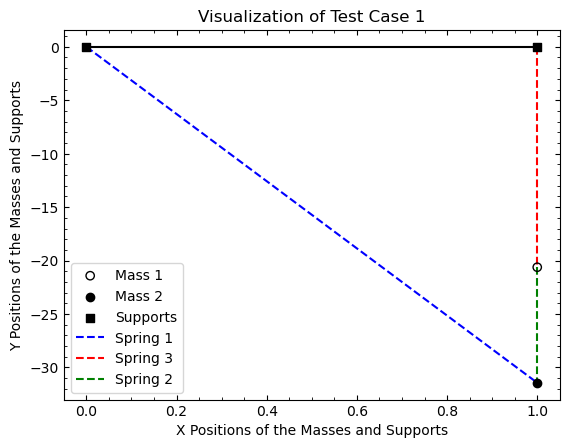

In [7]:
def visual(pos):
    """Plot a rough visualization of the supports, masses, and springs in our system. 

    Input:
        pos : array of the  x and y positions of mass 1 and 2
            pos[0] = x position mass 1
            pos[1] = x position mass 2
            pos[2] = y position mass 1
            pos[3] = y position mass 2       
    """
    fig=plt.figure()
    ax=fig.add_subplot(111)

    #plot the masses
    ax.scatter(pos[1], pos[3], edgecolors='k', facecolors='none', label="Mass 1")
    ax.scatter(pos[0], pos[2], c='k', label='Mass 2')
    
    #plot the supports and a line between them
    ax.scatter(0,0, c='k', marker='s', label="Supports")
    ax.scatter(1,0, c='k', marker='s')
    ax.plot([0,1], [0,0], 'k')

    #plot the springs
    ax.plot([0,1], [0, pos[2]], 'b', ls='--', zorder=0, label='Spring 1')
    ax.plot([1,1], [0, pos[3]], 'r', ls='--', zorder=0, label='Spring 3')
    ax.plot([1,1], [pos[3], pos[2]], 'green', ls='--', zorder=0, label='Spring 2')
    
    #label
    ax.set_xlabel("X Positions of the Masses and Supports")
    ax.set_ylabel("Y Positions of the Masses and Supports")
    ax.set_title("Visualization of Test Case 1")
    ax.legend()

visual(yvec)

### Application

We are now ready to apply our code to an unknown system. Consider the following. For the springs let the natural lengths in units of $d$ be given by $\ell_{0,1}=0.7$, $\ell_{0,2}=0.45$, and $\ell_{0,3}=0.2$, and the normalized spring constants be $\kappa_1=1.1$, $\kappa_2=2$, and $\kappa_3=0.6$. Let the normalized masses be $\mu_1=3$ and $\mu_2=1.4$. Make some reasonable initial guesses for the locations of the masses. Finally, use step sizes of $1\times10^{-5}$ for all the derivatives when calculating the Jacobian matrix.

Implement the above choices and use your code to solve for the static configuration. Print the final results for the locations of the masses (clearly showing what quantities are being printed, of course) along with the number of iterations required to converge to a solution. Also produce a visualization of the static configuration. How do you know if the algorithm converged?

In [8]:
y0=np.array([0.2,0.6,0.5,0.4])
l0=np.array([0.7,0.45,0.2])
kappa=np.array([1.1,2,0.6])
mu=np.array([3,1.4])
h=np.array([10**-5,10**-5,10**-5,10**-5])



(sol, niter)=newton_raphson_iterate(static_conditions, Jacobian, y0, h, 40, args=(l0, kappa, mu), atol=1e-10, rtol=1e-10)
print(niter)
sol

11


array([  0.78750256,   1.09399385,  12.29980783, -15.63848262])

## Member Participation

See Lab00 for instructions on turning in labs. We will follow this procedure the entire semester.

In the following cell enter the *Case ID* for each student in the group who participated in this lab. Again, see Lab00 for more details. It is expected that you have read and understood those details.

sgg64 vwf5 skv34